In [1]:
# Importing cell

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

-----------------------------

# Physical Models of Living Systems

#### *Rafaele Gaudio 2057974*

-----------------------------

## Week 3: - Deadline 3 November 

Consider the Lotka-Volterra equations
$$
\begin{cases}
\frac{dx}{dt}= a x - p x y   \quad (1)\\
\frac{dy}{dt}=-c y + p x y    \quad  (2)
\end{cases}
$$
1) Find the stationary solutions

2) Do the stability analysis of the stationary solutions. Is there any stable solution?

3) (optional) Simulate Eqs.(1)(2) with different parameters. Is there a range of parameters where do you observe sustained oscillations?



-----------------------------


## 1. Stationary solutions

In order to find the stationary solutions we impose:

$$
\frac{dy}{dt}=0 \rightarrow y(px-c)=0
$$

that holds if:

$$
y^*=0 \quad \text{or} \quad x^*=\frac{c}{p}
$$

The stationary solutions $z^*_i$ for $i=1,2$ are:

$$
y^*=0 \rightarrow x^*=0 \Rightarrow z^*_1=(0,0)
$$

$$
x^*=\frac{c}{p} \rightarrow y^*=\frac{a}{p} \Rightarrow z^*_2=\left(\frac{c}{p},\frac{a}{p}\right)
$$

## 2. Stability analysis

We can derive the stability conditions by studing the eigenvalues of the Jacobian eavaluated in the stationary points:

$$
J_i=
\begin{pmatrix} a-py & -px \\
py&-c+px
\end{pmatrix}\bigg|_{z^*_i=(x^*_i,y^*_i)}
$$

For $z^*_1=(0,0)$ we obtain an unstable equilibrium because we have an eigenvalue positive and the other one negative.

$$
J_1=
\begin{pmatrix} a & 0 \\
0&-c
\end{pmatrix} \rightarrow \text{unstable solution}
$$

For $z^*_2=\left(\frac{c}{p},\frac{a}{p}\right)$ we obtain a stable equilibrium because we have two pure immaginary eigenvalues that correspond to an hamonic oscillator:

$$
J_2=
\begin{pmatrix} 0 & -c \\
a&0
\end{pmatrix}
$$

$$
\text{det}[J_2-\lambda \mathbb{I}]=\text{det}\begin{pmatrix} -\lambda & -c \\
a&-\lambda
\end{pmatrix}=\lambda^2+ac=0
$$

$$
\lambda_{1,2}=\pm \Im(ac) \rightarrow \text{stable solution}
$$

## 3. Simulations (optional)

In this section we will simulate the system given the following parameters:
$$
a=0.8, \quad
c=0.5, \quad
p=0.01; \quad
x(0)= 100 \quad
y(0)=70
$$


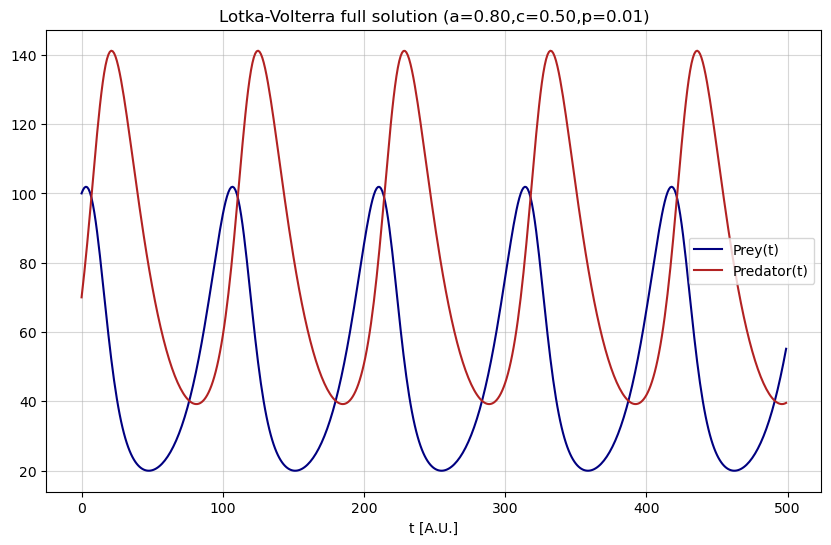

In [2]:
time_period=500
time_unit=0.1

def prey_step(delta_t,a,p,prey_t,predator_t):
    prey_step=prey_t+(a*prey_t-p*prey_t*predator_t)*delta_t
    return(prey_step)

def predator_step(delta_t,c,p,prey_t_step,predator_t):
    predator_step=predator_t+(-c*predator_t +p*prey_t_step*predator_t)*delta_t
    return(predator_step)

a=0.8
c=0.5
p=0.01  

prey=np.ones(time_period)
predator=np.ones(time_period)

prey[0]=100
predator[0]=70

for i in range(1,time_period):
    prey[i]=prey_step(time_unit,a,p,prey[i-1],predator[i-1])
    predator[i]=predator_step(time_unit,c,p,prey[i],predator[i-1])

fig, ax = plt.subplots(figsize=(10,6))
ax.set(xlabel="t [A.U.]", ylabel="", title="Lotka-Volterra full solution (a={:.2f},c={:.2f},p={:.2f})".format(a,c,p))
ax.plot(range(time_period), prey, label='Prey(t)',color="navy")
ax.plot(range(time_period), predator, label='Predator(t)',color="firebrick")
ax.legend();
ax.grid(alpha=0.5)


### 3.1. Changing *p*

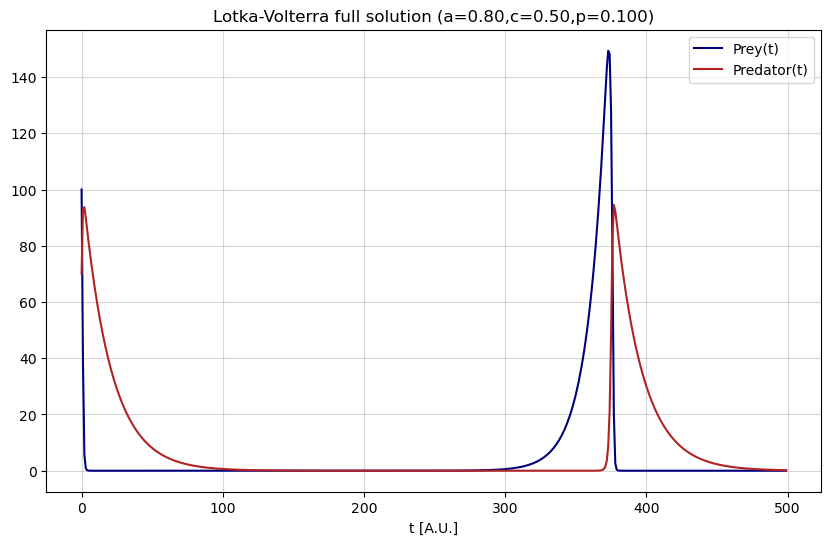

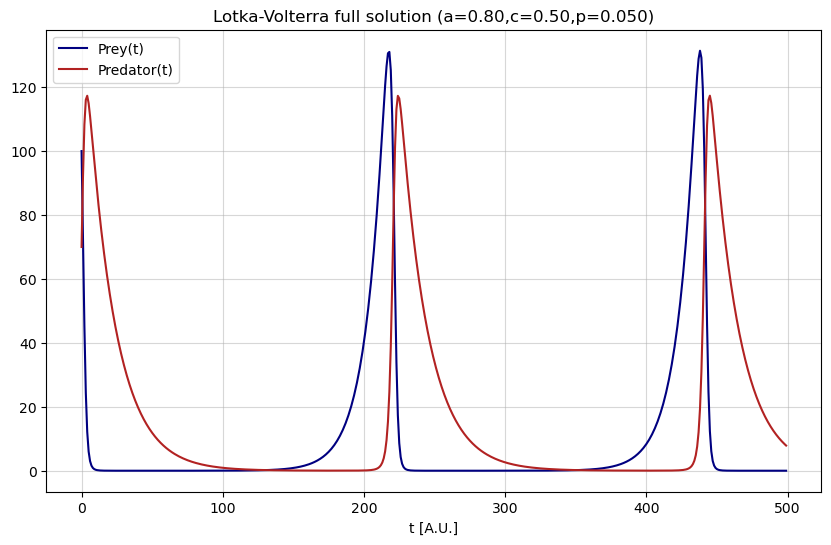

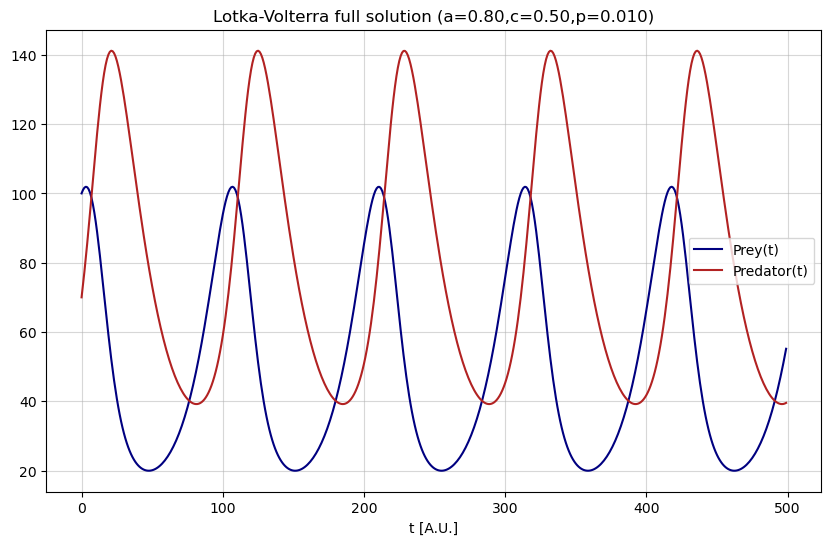

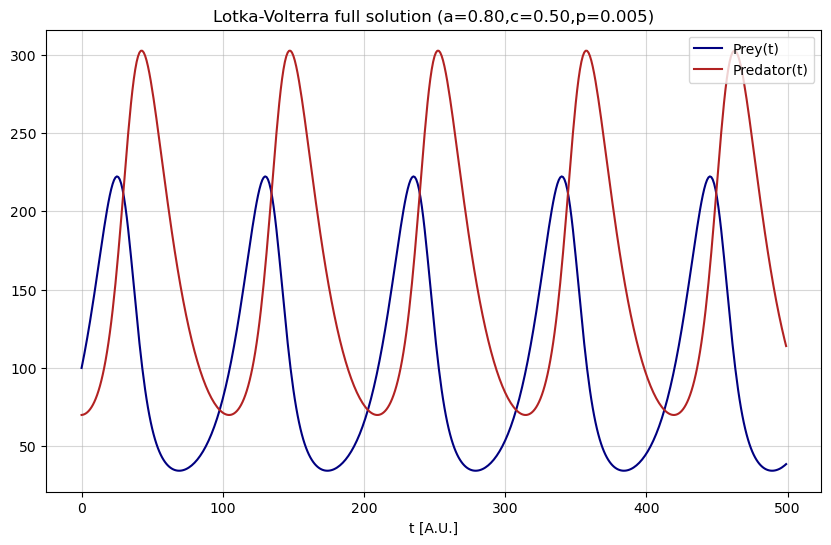

In [3]:
p_array = [0.1, 0.05, 0.01, 0.005]

for ps in p_array:
    for i in range(1,time_period):
        prey[i]=prey_step(time_unit,a,ps,prey[i-1],predator[i-1])
        predator[i]=predator_step(time_unit,c,ps,prey[i],predator[i-1])

    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel="t [A.U.]", ylabel="", title="Lotka-Volterra full solution (a={:.2f},c={:.2f},p={:.3f})".format(a,c,ps))
    ax.plot(range(time_period), prey, label='Prey(t)',color="navy")
    ax.plot(range(time_period), predator, label='Predator(t)',color="firebrick")
    ax.legend();
    ax.grid(alpha=0.5)

### 3.2. Changing *a*

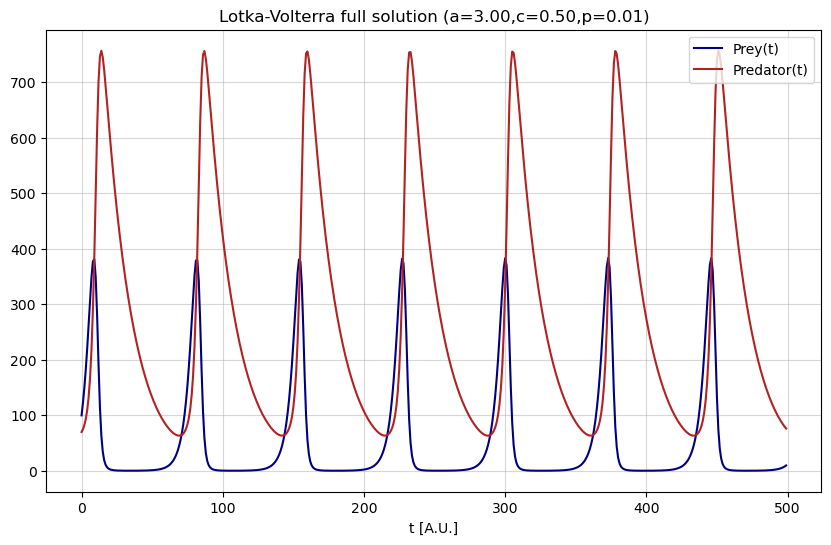

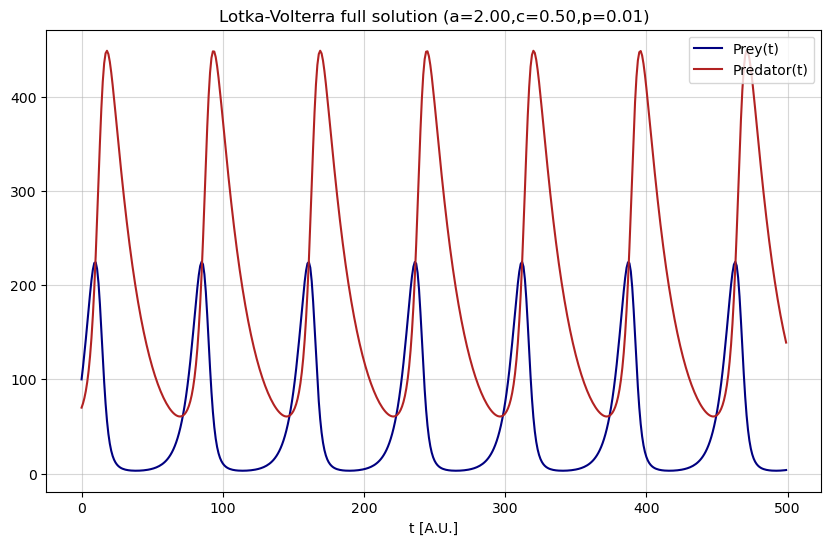

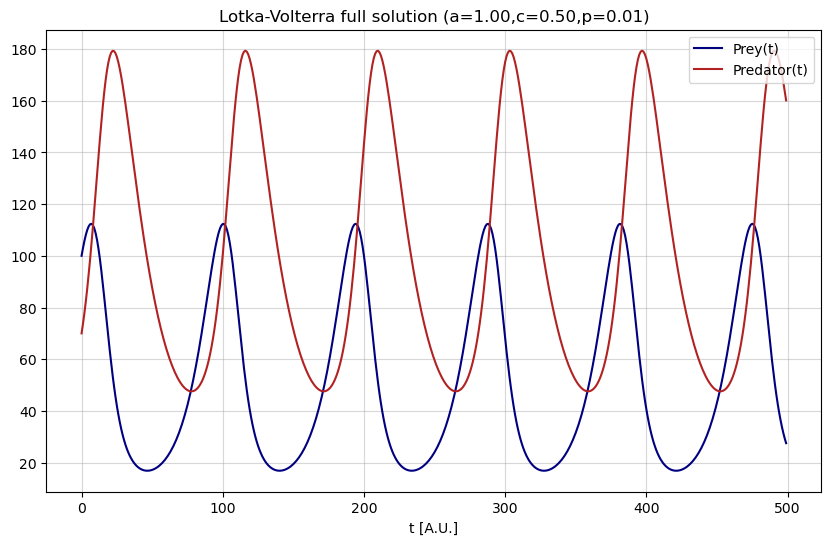

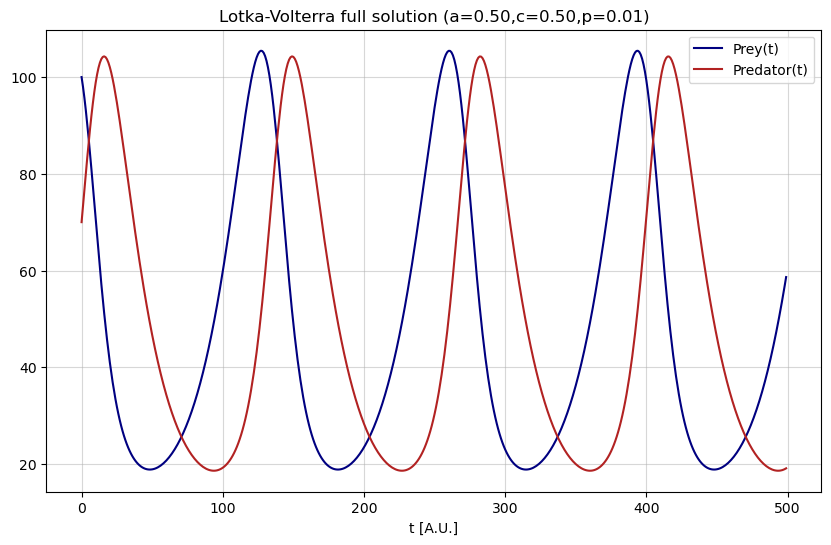

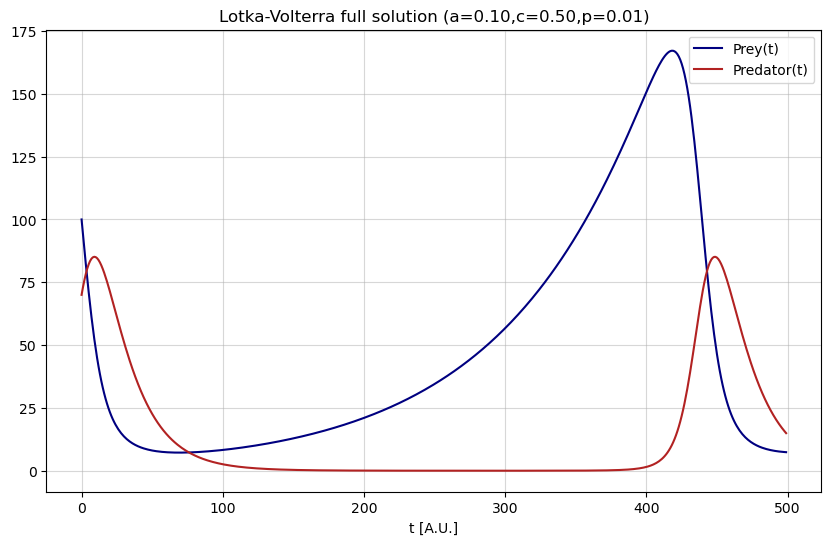

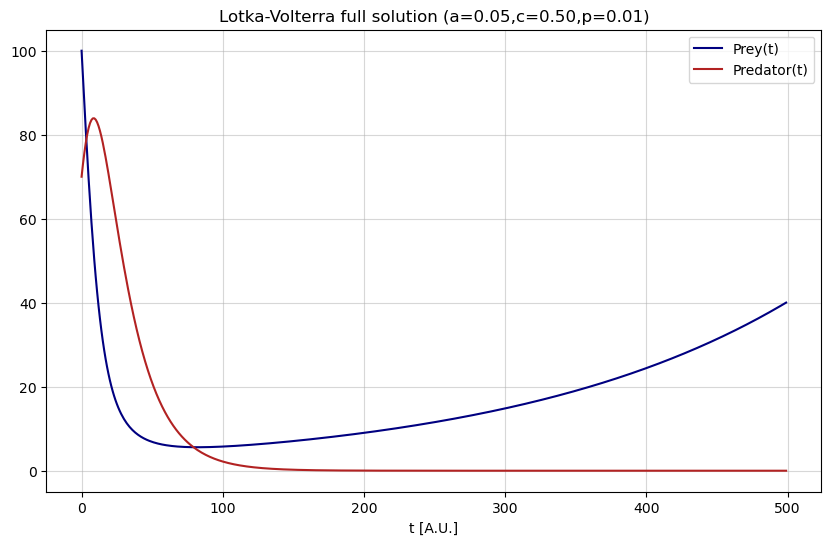

In [4]:
a_array = [3,2,1, 0.5, 0.1, 0.05]

for aa in a_array:
    for i in range(1,time_period):
        prey[i]=prey_step(time_unit,aa,p,prey[i-1],predator[i-1])
        predator[i]=predator_step(time_unit,c,p,prey[i],predator[i-1])

    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel="t [A.U.]", ylabel="", title="Lotka-Volterra full solution (a={:.2f},c={:.2f},p={:.2f})".format(aa,c,p))
    ax.plot(range(time_period), prey, label='Prey(t)',color="navy")
    ax.plot(range(time_period), predator, label='Predator(t)',color="firebrick")
    ax.legend();
    ax.grid(alpha=0.5)

### 3.3. Changing *c*

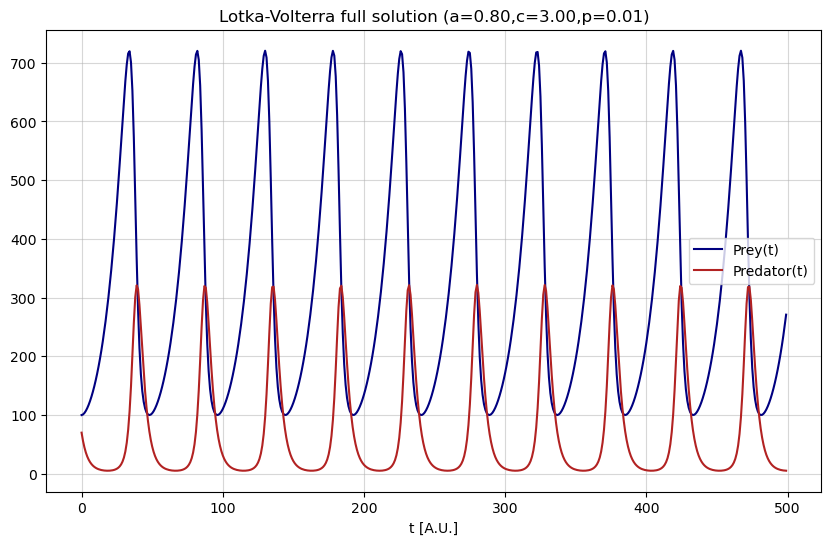

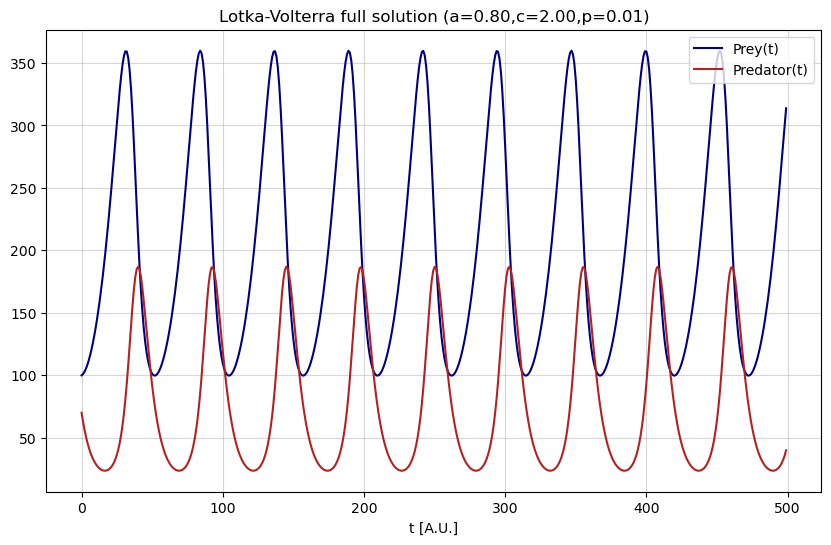

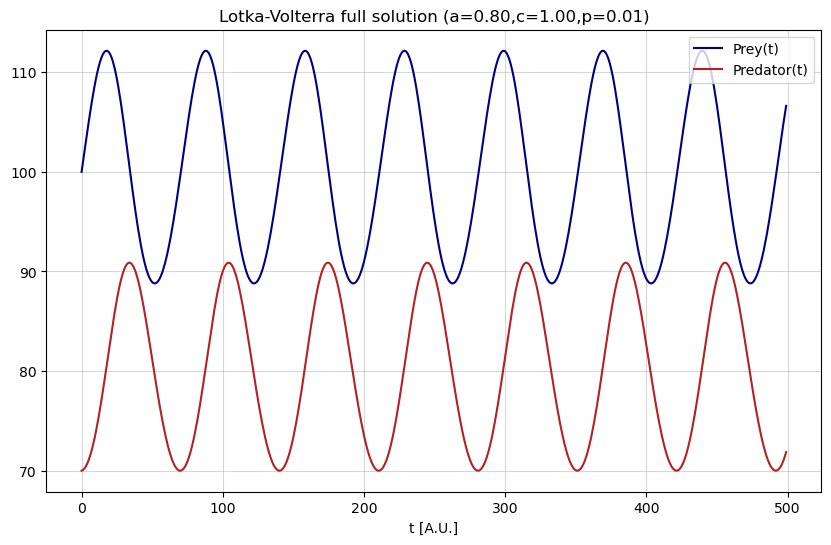

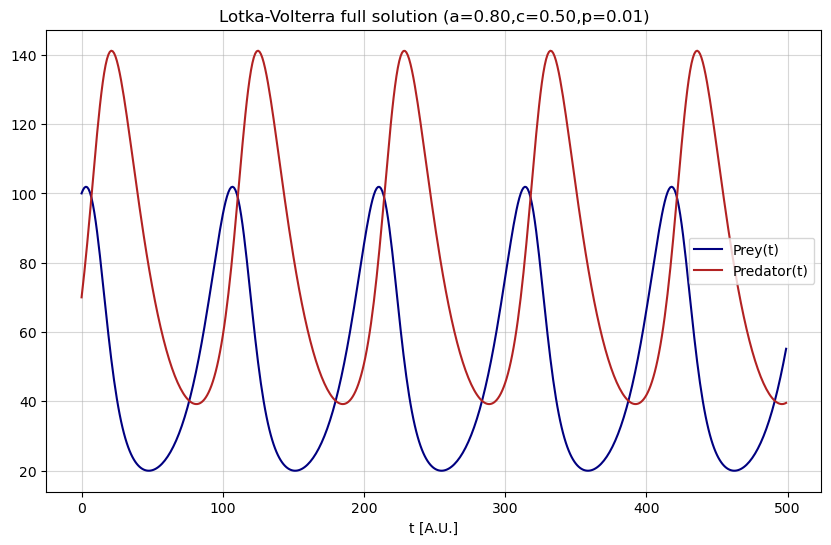

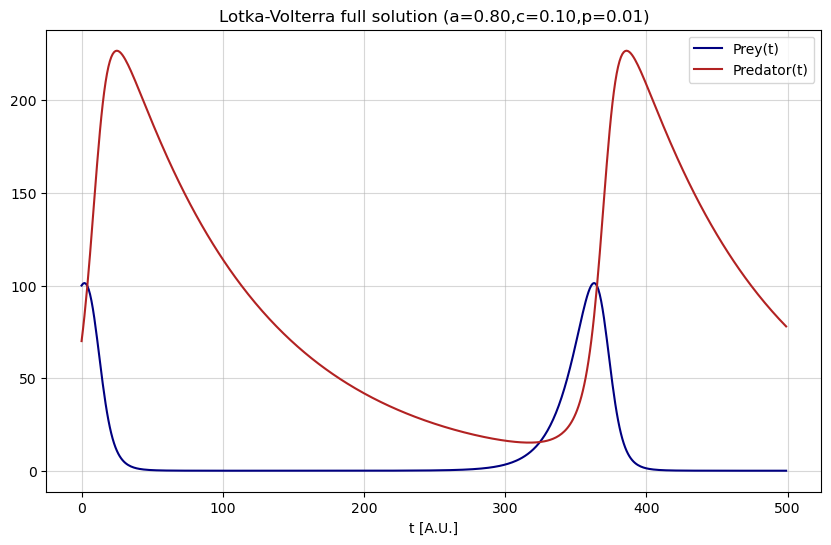

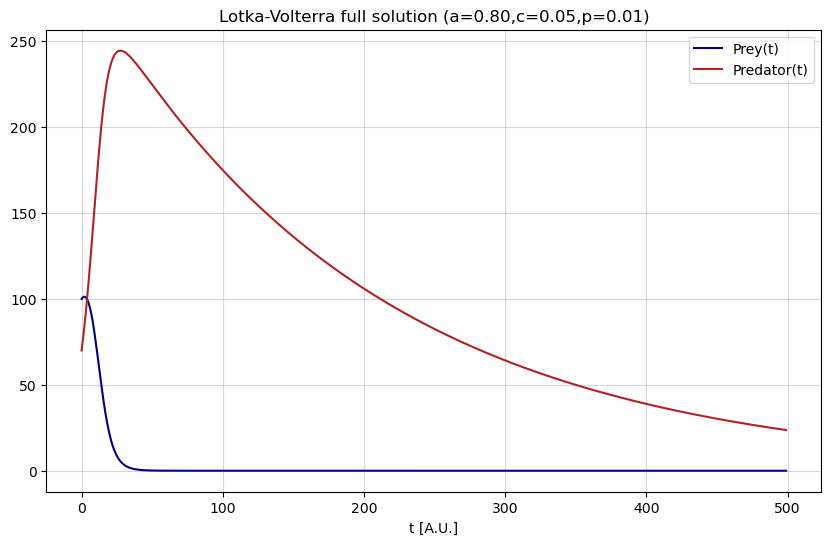

In [5]:
c_array = [3,2,1, 0.5, 0.1, 0.05]

for cc in c_array:
    for i in range(1,time_period):
        prey[i]=prey_step(time_unit,a,p,prey[i-1],predator[i-1])
        predator[i]=predator_step(time_unit,cc,p,prey[i],predator[i-1])

    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel="t [A.U.]", ylabel="", title="Lotka-Volterra full solution (a={:.2f},c={:.2f},p={:.2f})".format(a,cc,p))
    ax.plot(range(time_period), prey, label='Prey(t)',color="navy")
    ax.plot(range(time_period), predator, label='Predator(t)',color="firebrick")
    ax.legend();
    ax.grid(alpha=0.5)

### 3.4. Oscillation period vs *p*

As we can observe from the previous simulations, different values ​​of parameters produce visible variations on the period of oscillation both on the dynamics of the prey and the predators.

In order to obtain a range of parameters where we do observe sustained oscillations, we decide to analize when the oscillation period diverges respect to those parameters.

We start first with the interaction parameter $p$ keeping fixed $a=0.8$, $c=0.5$ and the initial conditions.

In [6]:
def find_preiod_p(signal):
    peaks, _ = find_peaks(prey, height=0)
#     print(peaks)
    if len(peaks)<2: return None, 0
    else: return peaks[1]-peaks[0], None
    
def find_preiod(signal):
    peaks, _ = find_peaks(prey, height=0)
#     print(peaks)
    if len(peaks)<2: return None
    else: return peaks[1]-peaks[0]

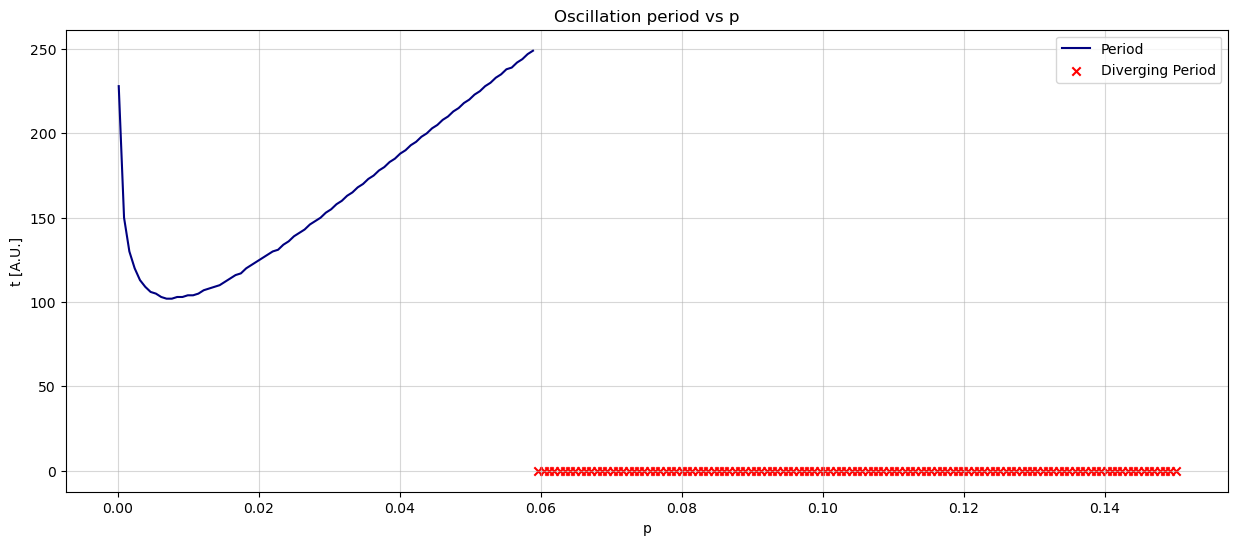

In [7]:
time_period=500 

p_array = np.linspace(0.15, 0.0001, 200)
p_periods = []

for ps in p_array:  
    for i in range(1,time_period):
        prey[i]=prey_step(time_unit,a,ps,prey[i-1],predator[i-1])
        predator[i]=predator_step(time_unit,c,ps,prey[i],predator[i-1])
        
    # compute and append the time period of rhe oscillation
    p_periods = [*p_periods, find_preiod_p(prey)]
    
# print(p_periods)
div_periods = np.array(p_periods)[:,1]
conv_periods = np.array(p_periods)[:,0]
plt.figure(figsize=(15,6))
plt.title('Oscillation period vs p')
plt.xlabel("p")
plt.ylabel("t [A.U.]")
plt.plot(p_array, conv_periods, label='Period',color="navy")
plt.scatter(p_array, div_periods, label='Diverging Period',marker="x",color="red")
plt.grid(alpha=0.5), plt.legend()
plt.show();

As shown in the graphic above, we have finite oscillation for $0.0001 \le p < 0.06$, otherwise the period of oscillation begins to diverge. This behavior is due to the accuracy limits of the machine for those particular fixed values of $a$ and $c$ and the initial conditions.

### 3.5. Oscillation period vs *a*,*c*

In this case we let the parameters $a$ and $c$ change, keeping $p=0.01$ and the initial conditions fixed.

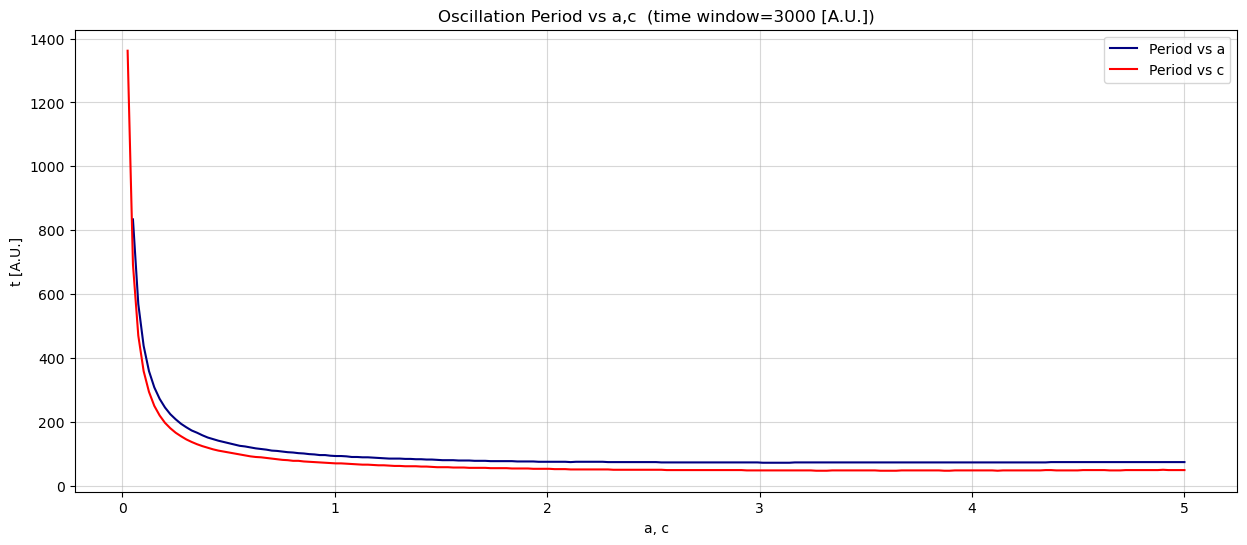

In [8]:
time_period = 3000
prey=np.ones(time_period)
predator=np.ones(time_period)

prey[0]=100
predator[0]=70

values_array = np.linspace(5, 0.00001, 200)
a_periods = []
c_periods = []

for aa in values_array:   
    for i in range(1,time_period):
        prey[i]=prey_step(time_unit,aa,p,prey[i-1],predator[i-1])
        predator[i]=predator_step(time_unit,c,p,prey[i],predator[i-1])
        
    # compute and append the time period of the oscillation
    a_periods = [*a_periods, find_preiod(prey)]

for cc in values_array:   
    for i in range(1,time_period):
        prey[i]=prey_step(time_unit,a,p,prey[i-1],predator[i-1])
        predator[i]=predator_step(time_unit,cc,p,prey[i],predator[i-1])
        
    # compute and append the time period of the oscillation
    c_periods = [*c_periods, find_preiod(prey)]
    
# print(p_periods)
plt.figure(figsize=(15,6))
plt.title('Oscillation Period vs a,c  (time window={} [A.U.])'.format(time_period))
plt.xlabel("a, c")
plt.ylabel("t [A.U.]")
plt.plot(values_array, a_periods, label='Period vs a',color="navy")
plt.plot(values_array, c_periods, label='Period vs c',color="red")
plt.grid(alpha=0.5), plt.legend()
plt.show()

For large values of $a$ and $c$ the oscillation period reach its minimum and saturates for values approximately greater than 2.
As $a$ and $c$ approaches to 0, we still be able to obsarve oscillations, provided to have a sufficiently large time window.


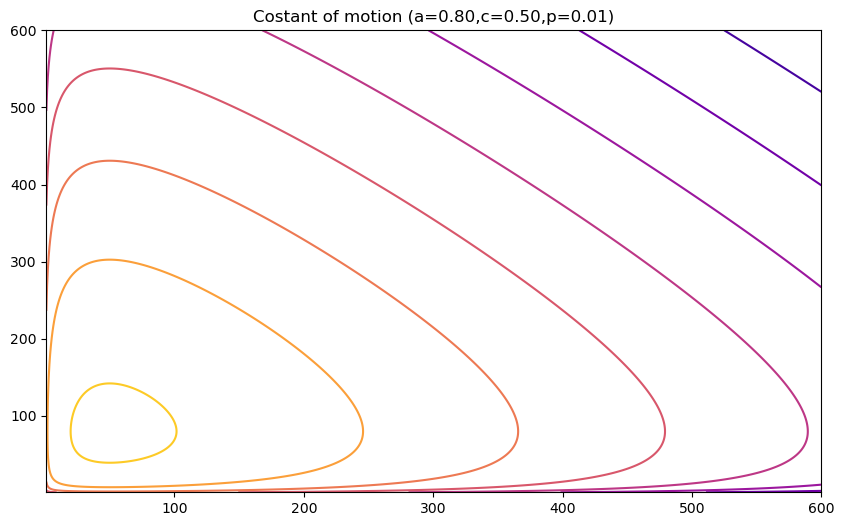

In [9]:
def energy(x,y,a,c,p):
    H=np.log((x**c)*(y**a))-p*(x+y)
    return(H)

a=0.8
c=0.5
p=0.01

energy_vect=np.vectorize(energy)

xx,yy=np.meshgrid(np.linspace(1,600,1000),np.linspace(1,600,1000))

fig, ax = plt.subplots(figsize=(10,6))
ax.set(title="Costant of motion (a={:.2f},c={:.2f},p={:.2f})".format(a,c,p))
ax.contour(xx,yy,energy_vect(xx,yy,a,c,p),cmap="plasma");